In [31]:
#Logistic Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5,1,'sigmoid fxn')

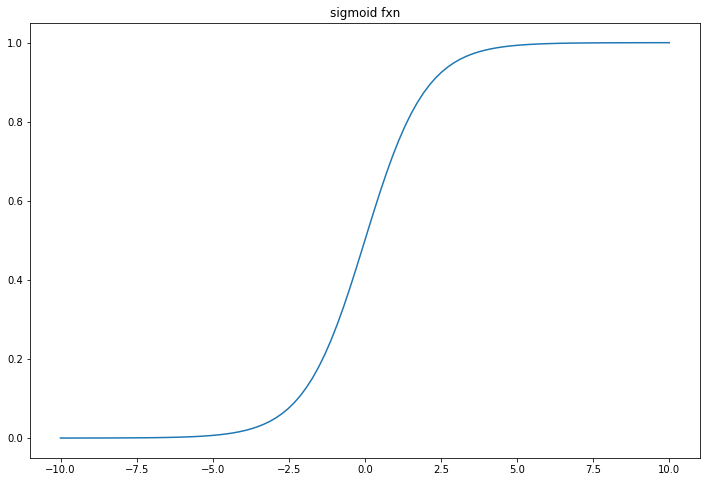

In [3]:
x = np.linspace(-10, 10, num = 100)
plt.figure(figsize = (12, 8))
plt.plot(x, 1 / (1+ np.exp(-x)))
plt.title("sigmoid fxn")

In [6]:
train_set = pd.read_csv('mnist_train.csv')

In [10]:
train_set
#typically we shuffle the training 

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train = train_set.iloc[:, 1:].values

In [25]:
y_train = train_set.iloc[:, 0].values

In [26]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
y_train

array([0, 4, 1, ..., 5, 6, 8])

In [29]:
X_train.shape

(59999, 784)

In [30]:
y_train.shape

(59999,)

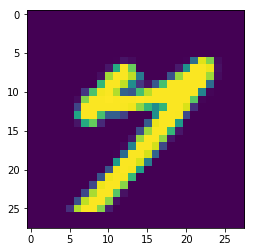

In [34]:
_ = X_train[1000]
_image = _.reshape(28, 28)
plt.imshow(_image);

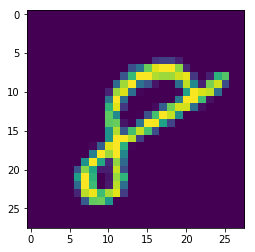

In [36]:
_ = X_train[59998]
_image = _.reshape(28, 28)
plt.imshow(_image);

In [37]:
y_train[1000]

7

In [38]:
y_train[59998]

8

In [40]:
#Locating the number 4 and plot the image
np.where(y_train == 4)

(array([    1,     8,    19, ..., 59942, 59950, 59974]),)

In [42]:
y_train[1]

4

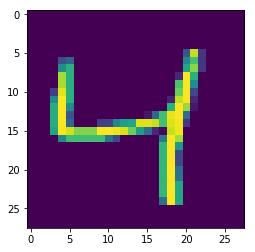

In [43]:
_ = X_train[1]
_image = _.reshape(28, 28)
plt.imshow(_image);

In [44]:
test_set = pd.read_csv("mnist_test.csv")

In [45]:
test_set

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_test = test_set.iloc[:, 0].values

In [47]:
X_test = test_set.iloc[:, 1:].values

In [49]:
#fitting logistic regression in the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
y_pred

array([2, 1, 0, ..., 4, 5, 6])

In [87]:
y_test

array([2, 1, 0, ..., 4, 5, 6])

In [89]:
from sklearn.metrics import confusion_matrix
am = confusion_matrix(y_test, y_pred)

In [90]:
cm

array([[ 960,    0,    2,    1,    0,    3,    7,    2,    3,    2],
       [   0, 1108,    4,    3,    0,    1,    5,    1,   13,    0],
       [   9,    9,  904,   20,    7,    4,   13,   15,   48,    3],
       [   4,    0,   17,  920,    2,   22,    5,   10,   22,    8],
       [   1,    2,    5,    5,  911,    0,    9,    3,   10,   36],
       [   9,    1,    0,   38,   10,  768,   16,    8,   34,    8],
       [   8,    4,    7,    0,    5,   19,  908,    0,    7,    0],
       [   3,    8,   23,    6,    7,    2,    1,  941,    5,   31],
       [  11,   14,    6,   22,   12,   20,   10,   11,  858,   10],
       [   8,    7,    2,   15,   29,    9,    0,   27,   13,  899]])

In [57]:
#Training a binary classifier
y_train_0 = (y_train == 0)

In [58]:
y_train_0

array([ True, False, False, ..., False, False, False])

In [60]:
y_test_0 = (y_test == 0)

In [61]:
y_test_0

array([False, False,  True, ..., False, False, False])

In [98]:
#SGD (Stochastic Gradient Descent) Classifier ~ if loss = hinge then it's SVM and if loss = log then it's Logistic Regression
#here, we used SVM to train the model
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)   

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [65]:
#Prediction
clf.predict(X_train[1000].reshape(1, -1))

array([False])

In [66]:
#correct result, as we know X[1000] = 7

In [67]:
#Performance Measures ~ Measuring Accuracy using cross-validation
#StratifiedKFold ~ Stratified sampling to create multiple folds. At each iteration, the classifier was cloned and training folds and makes predictions on the test fold 

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state = 0)

In [70]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 100)

In [74]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_fold = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:4f}".format(n_correct/len(y_pred)))


/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.987401


/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.987899


/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.985599


In [ ]:
#cross_val_score using K-fold Cross-Validation
#K-fold cross-validation splits the training set into K-folds and 
#then make predictions and evaluate them on each fold using a model trained on remaining folds 

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv = 3, scoring = "accuracy")

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/

array([0.98740063, 0.98789939, 0.98559928])

In [76]:
#if we would like to perform 10-fold CV
cross_val_score(clf, X_train, y_train_0, cv = 10, scoring = 'accuracy')

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/

array([0.98150308, 0.98600233, 0.97167139, 0.98866667, 0.98866667,
       0.98633333, 0.98616436, 0.98899817, 0.98649775, 0.98683114])

In [79]:
#Danger of blindly applying evaluator as a performance measure
#let's check against a dumb classifier
proportion_of_zeroes = sum(y_train_0)/len(y_train_0)

In [80]:
proportion_of_non_zeroes = 1 - proportion_of_zeroes 

In [81]:
proportion_of_non_zeroes

0.9012816880281338

In [82]:
#A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the same.
#Bare this in mind when you are dealing with skewed datasets. Because of this, accuracy is generally not the predicted performance measure for classifiers

In [83]:
#So, we'll use the confusion matrix as a performance measure
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv = 3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/

array([[53708,   368],
       [  414,  5509]])

In [91]:
#About Confusion Matrix ~ 
#row wise-actual values and column wise-predicted values
#first row is the negative class (In our case, non-zeroes)
#Second row is positive class (Zeroes, in our case)
#first column is negative prediction
#Second column is positive prediction

In [92]:
#Precision
#It measures accuracy of positive predictions.
#precision = (True Positives/(True Positives + False Positives))
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred) #5509 / (368 + 5509)

0.9373830185468777

In [93]:
5509 / (368 + 5509)

0.9373830185468777

In [94]:
#Recall ~ It is typically used with recall (Positive rate).
#Ratio of positive instances that are correctly detected by the classifier
#Recall = true Positives / (True Positives + False Negatives)

In [96]:
recall_score(y_train_0, y_train_pred) #5509 / (5509 + 414)

0.9301029883504981

In [97]:
5509 / (5509 + 414)

0.9301029883504981

In [99]:
# F1 Score
# F1 score is the harmonic mean of precision and recall
# Regular mean gives equal weights to all values
# Harmonic mean gives more weight to low values
# F1 =  2 / ((1 / precision) + (1/recall))
# therefore, F1 = TP / (TP + (FN + FP)/2)

In [100]:
from sklearn.metrics import f1_score

In [101]:
f1_score(y_train_0, y_train_pred)

0.933728813559322

/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/anubansal17/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/

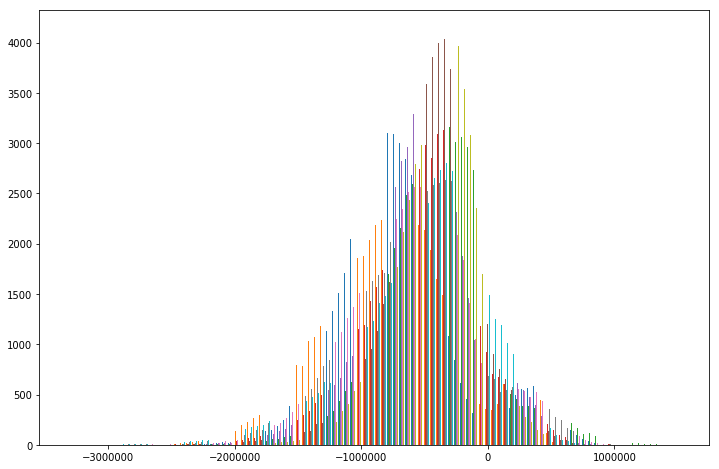

In [104]:
#Precision / Recall Tradeoff
#When we try to increase precision, recall will decrease and vice versa is also true
y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method = 'decision_function')
plt.figure(figsize=(12,8));
plt.hist(y_scores, bins = 100);

In [105]:
#With the decision scores, we can compute precision and recall for all possible thresholds using precision_recall_curve() function

In [108]:
# Select any threshold value that gives the best precision/recall tradeoff for the task
# Some tasks may call for higher precision (accuracy of positive predictions) like designing a classifier that picks up adult contents to protect kids.
# ~ This will require th e classifier to set a high bar to allow any contents to be consumed by children
# Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier), such asshoplifters/intruders on survellance images
# ~ Anything that remotely resemble "positive" instances to be picked up

In [109]:
#Receiver Operating Characterstics (ROC) Curve
#Instead of plotting precision versus recall, the ROC curve plots the true positive rate (recall) against the false positive rate. 
#The false positive rate (FPR) is the ratio of negative instance sthat are incorrectly classified as positive, it is equal to one minus the true negative rate, 
# ~ which is the ratio of negative instances that are correctly classified as negative
# The TNR is also called specificity. Hence the ROC curve plots sensitivity(recall) versus 1 - specificity

In [113]:
#Use PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives
#Use ROC cuve whenever the negative class is rare or when you care more about the false negatives than the false positives